# Data Preparation



## Introduction

Import data aa


General Information:

- SPK-ID & Object ID: Unique identifiers for the asteroid within different databases. Not directly relevant to hazard assessment.
- Object fullname, pdes, name: Different designations for the asteroid. Consider using the official IAU name for consistency.
- Equinox not important 


Hazard Potential Indicators:

- NEO: Flag indicating if the asteroid is a Near-Earth Object (NEO), meaning its orbit brings it close to Earth. NEOs are potential candidates for hazardous impacts.
- PHA: Flag indicating if the asteroid is a Potentially Hazardous Asteroid (PHA). PHAs are NEOs with a large enough size and close enough approach to Earth to pose a threat in the future. This is a crucial factor for hazard assessment.
Physical Characteristics:

- H: Absolute magnitude parameter, related to the brightness of the asteroid. Lower H values indicate a brighter and potentially larger asteroid.
- Diameter & Diameter_sigma: Estimated diameter of the asteroid in kilometers and its uncertainty. A larger diameter translates to a greater potential impact.
- Albedo: Reflectivity of the asteroid's surface. A higher albedo might indicate a denser composition, which could increase its impact threat.
Orbital Information:

- Orbit_id: Identifier for the specific orbital solution used.
- Epoch: Reference time for the orbital calculations.
- Equinox: Reference point for the orbital plane definition. These are not directly relevant for hazard assessment, but important for understanding the specific orbit solution used.
- e: Eccentricity, a measure of how circular the orbit is. A more eccentric orbit could bring the asteroid closer to Earth at certain points.
- a: Semi-major axis, the average distance between the asteroid and the Sun.
- q: Perihelion distance, the closest point in the asteroid's orbit to the Sun. A smaller perihelion distance increases the chance of an encounter with Earth.
- i: Inclination, the angle between the asteroid's orbital plane and Earth's orbital plane. A lower inclination increases the chance of a collision.
- tp: Time of perihelion passage, the date and time when the asteroid is closest to the Sun.
- moid_ld: Minimum Orbit Intersection Distance with Earth, the closest distance the asteroid's orbit comes to Earth's orbit (in Lunar Distances, where 1 LD is the average Earth-Moon distance). A smaller moid_ld indicates a higher potential for a future collision.

## Data Acquisition and Exploration

In [35]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [36]:
df1 = pd.read_csv('dataset.csv')

In [37]:
df1.head(5)

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [38]:
df1.nunique()

id                958524
spkid             958524
full_name         958524
pdes              958524
name               22064
prefix                 1
neo                    2
pha                    2
H                   9489
diameter           16591
albedo              1057
diameter_sigma      3054
orbit_id            4690
epoch               5246
epoch_mjd           5246
epoch_cal           5246
equinox                1
e                 958444
a                 958509
q                 958509
i                 958414
om                958518
w                 958519
ma                958519
ad                958505
n                 958514
tp                958519
tp_cal            958499
per               958510
per_y             958511
moid              314300
moid_ld           314301
sigma_e           254740
sigma_a           273297
sigma_q           248138
sigma_i           215741
sigma_om          223155
sigma_w           262719
sigma_ma          266816
sigma_ad          269241


In [39]:
df1.duplicated()


0         False
1         False
2         False
3         False
4         False
          ...  
958519    False
958520    False
958521    False
958522    False
958523    False
Length: 958524, dtype: bool

In [40]:
df1.isnull().sum()

id                     0
spkid                  0
full_name              0
pdes                   0
name              936460
prefix            958506
neo                    4
pha                19921
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
equinox                0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926


### Data exploration: Analyze the data -
Check data types, identify missing values and duplicates.
Use descriptive statistics to understand data distribution.
Visualize data using histograms, scatter plots etc.

In [41]:
df1.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,9.585240e+05,952261.000000,136209.000000,135103.000000,136081.000000,9.585240e+05,958524.000000,9.585240e+05,958524.000000,958524.000000,...,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.385980e+05,9.386020e+05,9.386020e+05,9.385980e+05,958522.000000
mean,3.810114e+06,16.906411,5.506429,0.130627,0.479184,2.458869e+06,58868.781950,2.019693e+07,0.156116,2.902143,...,1.982929e+01,1.168449e+00,5.310234e+00,1.370062e+06,1.369977e+06,2.131453e+01,5.060221e-02,4.312780e+08,8.525815e+04,0.561153
std,6.831541e+06,1.790405,9.425164,0.110323,0.782895,7.016716e+02,701.671573,1.930354e+04,0.092643,39.719503,...,2.903785e+03,1.282231e+02,1.333381e+03,9.158996e+08,9.158991e+08,7.197034e+03,9.814953e+00,2.953046e+11,2.767681e+07,2.745700
min,2.000001e+06,-1.100000,0.002500,0.001000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000000,-14702.447872,...,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,2.239632e+06,16.100000,2.780000,0.053000,0.180000,2.459000e+06,59000.000000,2.020053e+07,0.092193,2.387835,...,1.462000e-07,6.095900e-06,3.619400e-05,5.755000e-05,2.573700e-05,2.340900e-08,2.768800e-09,1.110900e-04,1.794500e-05,0.518040
50%,2.479262e+06,16.900000,3.972000,0.079000,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.145002,2.646969,...,2.271900e-07,8.688800e-06,6.642550e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,3.752518e+06,17.714000,5.765000,0.190000,0.620000,2.459000e+06,59000.000000,2.020053e+07,0.200650,3.001932,...,6.583200e-07,1.591500e-05,1.609775e-04,3.114400e-04,1.718900e-04,1.196600e-07,1.124000e-08,8.139600e-04,9.775475e-05,0.613927
max,5.401723e+07,33.200000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,1.855356,33488.895955,...,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


## Data Preprocessing

In [42]:
# removing all the columns that are not necessary for model training based on the column definition

df = df1.drop(['id','spkid', 'pdes', 'name', 'prefix', 'equinox'], axis='columns', inplace=False)

### Handle missing values

In [43]:
df.isnull().sum()

full_name              0
neo                    4
pha                19921
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926
sigma_n            19922
sigma_tp           19922
sigma_per          19926
class                  0
rms                    2
dtype: int64

In [44]:
# we can see that the data is too unbalanced so we need to be careful about removing the minority class Y values.
df['pha'].value_counts()

pha
N    936537
Y      2066
Name: count, dtype: int64

In [45]:
# removing null values for pha as without it we cannot use the rest of the data
df = df.dropna(subset=['pha'])

In [46]:
# list of columns with null values
columns_list = df.columns[df.isnull().any()].tolist() 


In [47]:
# this checks all the values of 'pha' where 'H' is null 
columns_affecting_minority = []
print("The following columns both y and n value : ")
for i in columns_list:
    j = df[df[i].isnull()]['pha'].unique()
    if 'Y' in j:    
        print("\t",i)
        columns_affecting_minority.append(i)


for i in columns_affecting_minority:
    columns_list.remove(i)


The following columns both y and n value : 
	 diameter
	 albedo
	 diameter_sigma


In [48]:
# that means the rest of the columns with null values dont affect the minority class of pha column
for i in columns_list:
    df = df.dropna(subset=[i])

In [49]:
df.isnull().sum()

full_name              0
neo                    0
pha                    0
H                      0
diameter          800290
albedo            801095
diameter_sigma    800418
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     0
ad                     0
n                      0
tp                     0
tp_cal                 0
per                    0
per_y                  0
moid                   0
moid_ld                0
sigma_e                0
sigma_a                0
sigma_q                0
sigma_i                0
sigma_om               0
sigma_w                0
sigma_ma               0
sigma_ad               0
sigma_n                0
sigma_tp               0
sigma_per              0
class                  0
rms                    0
dtype: int64

In [50]:
df = df.drop(['diameter','albedo','diameter_sigma'], axis='columns', inplace=False)




### Encoding categorical variables

In [51]:
df['class'].value_counts()

class
MBA    832650
OMB     27170
IMB     19702
MCA     17789
APO     12684
AMO      8448
TJN      8122
TNO      3459
ATE      1729
CEN       503
AST        57
IEO        22
Name: count, dtype: int64

In [52]:
df_encoded = pd.get_dummies(df['class'])
df = df.drop('class', axis=1)


In [53]:
df['pha'] = df['pha'].replace({'Y': 1, 'N': 0})
df['pha'].value_counts()


pha
0    930269
1      2066
Name: count, dtype: int64

In [54]:
df['neo'] = df['neo'].replace({'Y': 1, 'N': 0})
df['neo'].value_counts()


neo
0    909452
1     22883
Name: count, dtype: int64

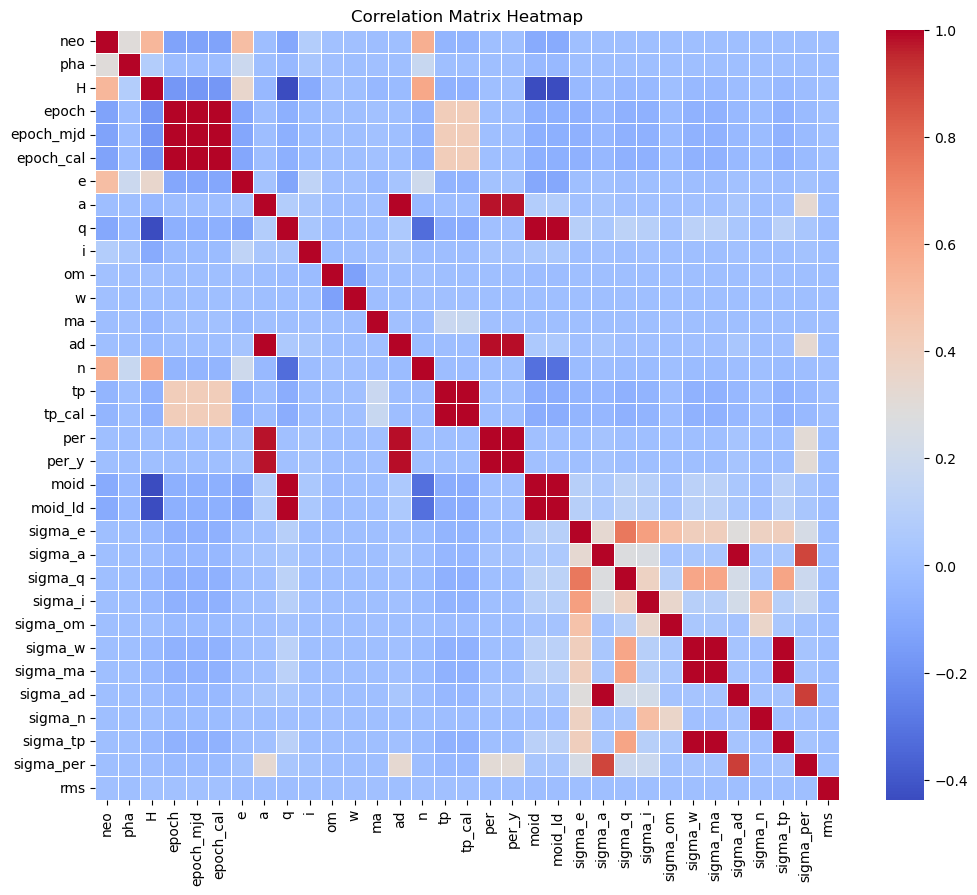

In [56]:
import seaborn as sns

# Define the numerical_columns variable
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


# Model Building

## Statistical tests

## Model Training


In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



In [89]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr, chi2_contingency

def test_correlation_statistical(df, target_col, feature_col):
  """
  Tests the correlation between a target column and a feature column
  using appropriate statistical methods.

  Args:
      df (pandas.DataFrame): The DataFrame containing the data.
      target_col (str): Name of the target column (assumed to be numerical).
      feature_col (str): Name of the feature column.

  Returns:
      tuple: (correlation coefficient, p-value)
  """

  X = df[feature_col].values.ravel()  # Extract 1D array from the feature column
  y = df[target_col]  # Select the target column

  # Choose the appropriate test based on data types
  if pd.api.types.is_numeric_dtype(X):  # If feature is numerical
      correlation, p_value = pearsonr(X, y.values.ravel())
      test_name = "Pearson Correlation"
  else:  # If feature is categorical (assuming target is numerical)
      contingency_table = pd.crosstab(X, y)  # Create contingency table (now works with 1D X)
      chi2, p_value, _, _ = chi2_contingency(contingency_table.values)
      correlation = None  # Not directly applicable for chi-square
      test_name = "Chi-Square Test"

  print(f"\n**Correlation between {target_col} and {feature_col} ({test_name}):**")
  if correlation is not None:  # Print correlation coefficient if applicable
      print(f"  - Correlation coefficient: {correlation:.4f}")
  print(f"  - p-value: {p_value:.4f}")


# Load and preprocess your data (replace with your data loading code)
 # Replace with your data path

# Separate numerical and categorical columns
numerical_cols = ["q", "moid_ld", "H", "e", "i"]
categorical_cols = ["neo", "pha"]

test_pairs = [
    ("neo", "q"),
    ("pha", "moid_ld"),
    ("pha", "H"),
    ("neo", "e"),
    ("neo", "i"),
]

for target_col, feature_col in test_pairs:
  if feature_col in numerical_cols:
      test_correlation_statistical(df.copy(), target_col, feature_col)
  else:
      test_correlation_statistical(df.copy(), target_col, feature_col)



**Correlation between neo and q (Pearson Correlation):**
  - Correlation coefficient: -0.1088
  - p-value: 0.0000

**Correlation between pha and moid_ld (Pearson Correlation):**
  - Correlation coefficient: -0.0303
  - p-value: 0.0000

**Correlation between pha and H (Pearson Correlation):**
  - Correlation coefficient: 0.0832
  - p-value: 0.0000

**Correlation between neo and e (Pearson Correlation):**
  - Correlation coefficient: 0.4908
  - p-value: 0.0000

**Correlation between neo and i (Pearson Correlation):**
  - Correlation coefficient: 0.0844
  - p-value: 0.0000



Test Pair: neo - q
- Null Hypothesis: There is no association between neo and q.
- Alternative Hypothesis: There is a significant association between NEO status and perihelion distance. Asteroids with smaller perihelion distances are more likely to be classified as NEOs.

- Model: KNeighborsClassifier
  - Accuracy: 1.0000
  - Precision: 1.0000
  - Recall: 0.9996
  - F1-score: 0.9998
--------------------------------------------------------------------------------

Sample Values and Predictions:
  - Sample 1: Value = 0.0705, Predicted Class = 1 (expected high probability)
  - Sample 2: Value = 20.1526, Predicted Class = 0 (expected low probability)
  - Sample 3: Value = 40.2347, Predicted Class = 0 (expected low probability)
  - Sample 4: Value = 60.3167, Predicted Class = 0 (expected low probability)
  - Sample 5: Value = 80.3988, Predicted Class = 0 (expected low probability)


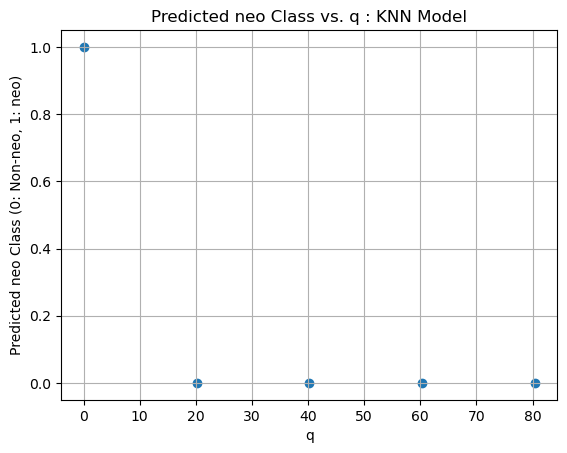


Test Pair: neo - q
- Null Hypothesis: There is no association between neo and q.
- Alternative Hypothesis: There is a significant association between NEO status and perihelion distance. Asteroids with smaller perihelion distances are more likely to be classified as NEOs.

- Model: XGBClassifier
  - Accuracy: 0.9990
  - Precision: 1.0000
  - Recall: 0.9584
  - F1-score: 0.9788
--------------------------------------------------------------------------------

Sample Values and Predictions:
  - Sample 1: Value = 0.0705, Predicted Class = 1 (expected high probability)
  - Sample 2: Value = 20.1526, Predicted Class = 0 (expected low probability)
  - Sample 3: Value = 40.2347, Predicted Class = 0 (expected low probability)
  - Sample 4: Value = 60.3167, Predicted Class = 0 (expected low probability)
  - Sample 5: Value = 80.3988, Predicted Class = 0 (expected low probability)


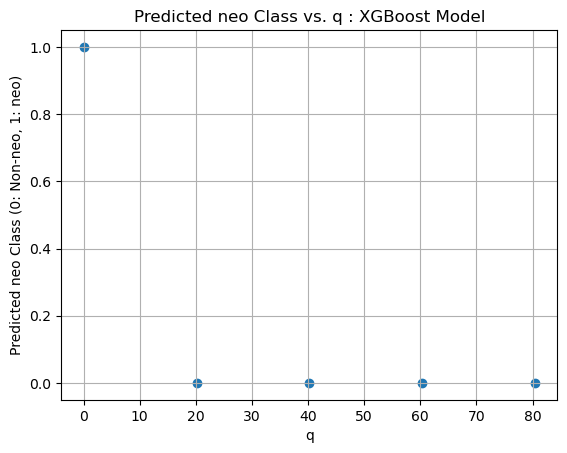


Test Pair: neo - q
- Null Hypothesis: There is no association between neo and q.
- Alternative Hypothesis: There is a significant association between NEO status and perihelion distance. Asteroids with smaller perihelion distances are more likely to be classified as NEOs.

- Model: RandomForestClassifier
  - Accuracy: 1.0000
  - Precision: 1.0000
  - Recall: 1.0000
  - F1-score: 1.0000
--------------------------------------------------------------------------------

Sample Values and Predictions:
  - Sample 1: Value = 0.0705, Predicted Class = 1 (expected high probability)
  - Sample 2: Value = 20.1526, Predicted Class = 0 (expected low probability)
  - Sample 3: Value = 40.2347, Predicted Class = 0 (expected low probability)
  - Sample 4: Value = 60.3167, Predicted Class = 0 (expected low probability)
  - Sample 5: Value = 80.3988, Predicted Class = 0 (expected low probability)


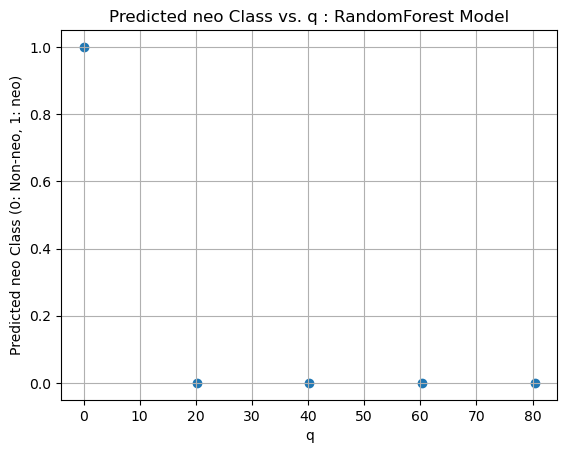


Test Pair: pha - moid_ld
- Null Hypothesis: There is no association between pha and moid_ld.
- Alternative Hypothesis: There is a significant association between PHA status and minimum orbit intersection distance. Asteroids with smaller minimum orbit intersection distance (moid_ld) are more likely to be classified as PHAs.

- Model: KNeighborsClassifier
  - Accuracy: 0.9976
  - Precision: 0.2400
  - Recall: 0.0775
  - F1-score: 0.1172
--------------------------------------------------------------------------------

Sample Values and Predictions:
  - Sample 1: Value = 0.0002, Predicted Class = 0 (expected low probability)
  - Sample 2: Value = 7732.4772, Predicted Class = 0 (expected low probability)
  - Sample 3: Value = 15464.9543, Predicted Class = 0 (expected low probability)
  - Sample 4: Value = 23197.4314, Predicted Class = 0 (expected low probability)
  - Sample 5: Value = 30929.9084, Predicted Class = 0 (expected low probability)


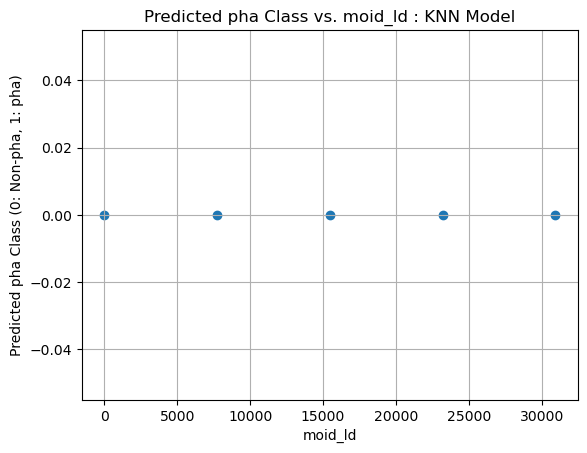


Test Pair: pha - moid_ld
- Null Hypothesis: There is no association between pha and moid_ld.
- Alternative Hypothesis: There is a significant association between PHA status and minimum orbit intersection distance. Asteroids with smaller minimum orbit intersection distance (moid_ld) are more likely to be classified as PHAs.

- Model: XGBClassifier
  - Accuracy: 0.9979
  - Precision: 0.0000
  - Recall: 0.0000
  - F1-score: 0.0000
--------------------------------------------------------------------------------

Sample Values and Predictions:
  - Sample 1: Value = 0.0002, Predicted Class = 0 (expected low probability)
  - Sample 2: Value = 7732.4772, Predicted Class = 0 (expected low probability)
  - Sample 3: Value = 15464.9543, Predicted Class = 0 (expected low probability)
  - Sample 4: Value = 23197.4314, Predicted Class = 0 (expected low probability)
  - Sample 5: Value = 30929.9084, Predicted Class = 0 (expected low probability)


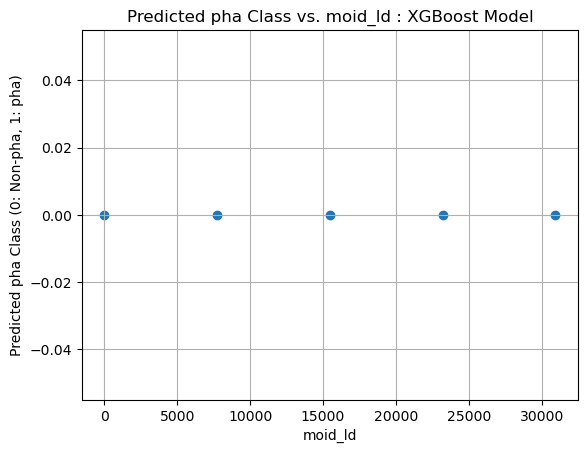


Test Pair: pha - moid_ld
- Null Hypothesis: There is no association between pha and moid_ld.
- Alternative Hypothesis: There is a significant association between PHA status and minimum orbit intersection distance. Asteroids with smaller minimum orbit intersection distance (moid_ld) are more likely to be classified as PHAs.

- Model: RandomForestClassifier
  - Accuracy: 0.9966
  - Precision: 0.2126
  - Recall: 0.2274
  - F1-score: 0.2197
--------------------------------------------------------------------------------

Sample Values and Predictions:
  - Sample 1: Value = 0.0002, Predicted Class = 0 (expected low probability)
  - Sample 2: Value = 7732.4772, Predicted Class = 0 (expected low probability)
  - Sample 3: Value = 15464.9543, Predicted Class = 0 (expected low probability)
  - Sample 4: Value = 23197.4314, Predicted Class = 0 (expected low probability)
  - Sample 5: Value = 30929.9084, Predicted Class = 0 (expected low probability)


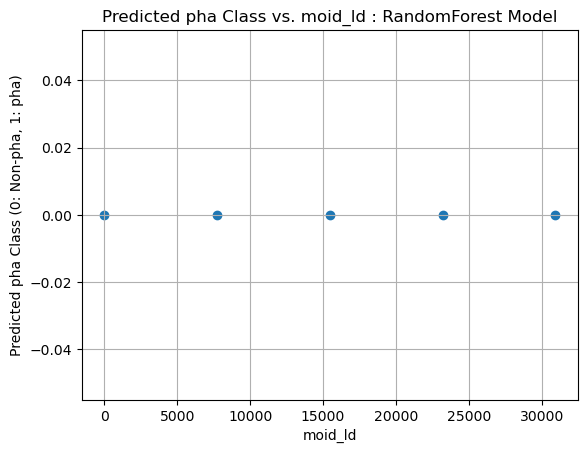


Test Pair: pha - H
- Null Hypothesis: There is no association between pha and H.
- Alternative Hypothesis: There is a significant association between PHA status and absolute magnitude. Asteroids marked as Potentially Hazardous Asteroids (PHAs) have lower absolute magnitude (H) values.

- Model: KNeighborsClassifier
  - Accuracy: 0.9976
  - Precision: 0.0988
  - Recall: 0.0207
  - F1-score: 0.0342
--------------------------------------------------------------------------------

Sample Values and Predictions:
  - Sample 1: Value = -1.1000, Predicted Class = 0 (expected low probability)
  - Sample 2: Value = 7.4750, Predicted Class = 0 (expected low probability)
  - Sample 3: Value = 16.0500, Predicted Class = 0 (expected low probability)
  - Sample 4: Value = 24.6250, Predicted Class = 0 (expected low probability)
  - Sample 5: Value = 33.2000, Predicted Class = 0 (expected low probability)


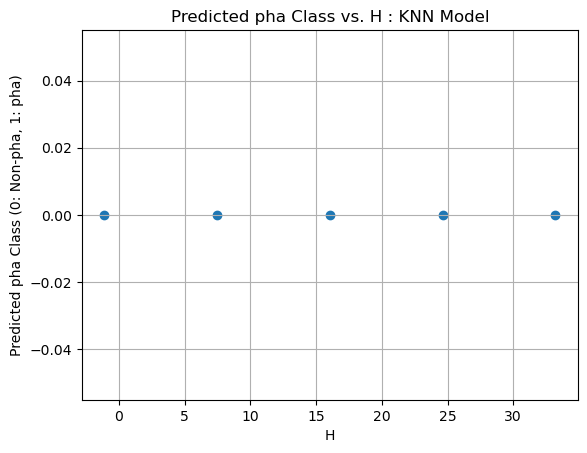


Test Pair: pha - H
- Null Hypothesis: There is no association between pha and H.
- Alternative Hypothesis: There is a significant association between PHA status and absolute magnitude. Asteroids marked as Potentially Hazardous Asteroids (PHAs) have lower absolute magnitude (H) values.

- Model: XGBClassifier
  - Accuracy: 0.9979
  - Precision: 0.0000
  - Recall: 0.0000
  - F1-score: 0.0000
--------------------------------------------------------------------------------

Sample Values and Predictions:
  - Sample 1: Value = -1.1000, Predicted Class = 0 (expected low probability)
  - Sample 2: Value = 7.4750, Predicted Class = 0 (expected low probability)
  - Sample 3: Value = 16.0500, Predicted Class = 0 (expected low probability)
  - Sample 4: Value = 24.6250, Predicted Class = 0 (expected low probability)
  - Sample 5: Value = 33.2000, Predicted Class = 0 (expected low probability)


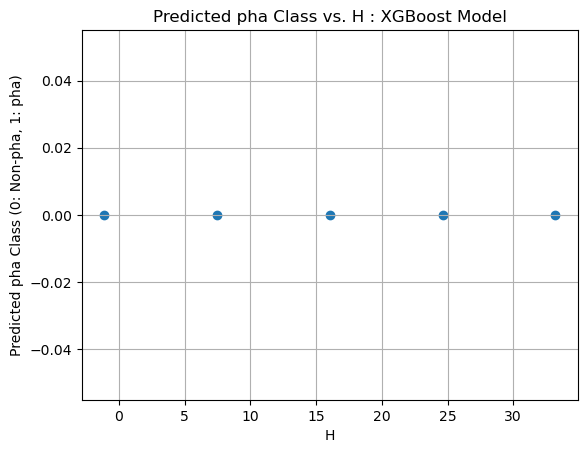


Test Pair: pha - H
- Null Hypothesis: There is no association between pha and H.
- Alternative Hypothesis: There is a significant association between PHA status and absolute magnitude. Asteroids marked as Potentially Hazardous Asteroids (PHAs) have lower absolute magnitude (H) values.

- Model: RandomForestClassifier
  - Accuracy: 0.9979
  - Precision: 0.0000
  - Recall: 0.0000
  - F1-score: 0.0000
--------------------------------------------------------------------------------

Sample Values and Predictions:
  - Sample 1: Value = -1.1000, Predicted Class = 0 (expected low probability)
  - Sample 2: Value = 7.4750, Predicted Class = 0 (expected low probability)
  - Sample 3: Value = 16.0500, Predicted Class = 0 (expected low probability)
  - Sample 4: Value = 24.6250, Predicted Class = 0 (expected low probability)
  - Sample 5: Value = 33.2000, Predicted Class = 0 (expected low probability)


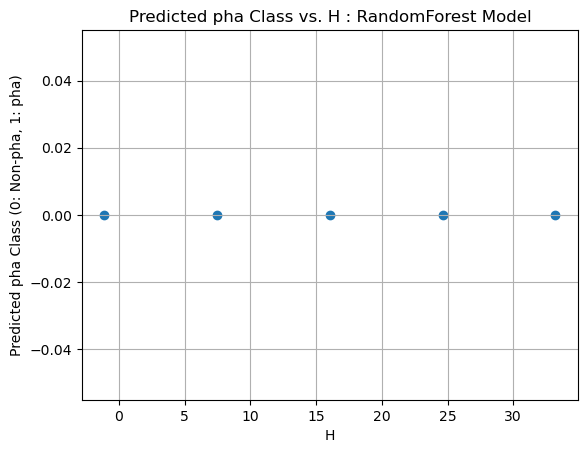


Test Pair: neo - e
- Null Hypothesis: There is no association between neo and e.
- Alternative Hypothesis: There is a significant association between NEO status and eccentricity. Near-Earth Objects (NEOs) have higher eccentricity.

- Model: KNeighborsClassifier
  - Accuracy: 0.9843
  - Precision: 0.7427
  - Recall: 0.5381
  - F1-score: 0.6241
--------------------------------------------------------------------------------

Sample Values and Predictions:
  - Sample 1: Value = 0.0000, Predicted Class = 0 (expected low probability)
  - Sample 2: Value = 0.2500, Predicted Class = 0 (expected low probability)
  - Sample 3: Value = 0.4999, Predicted Class = 1 (expected high probability)
  - Sample 4: Value = 0.7499, Predicted Class = 1 (expected high probability)
  - Sample 5: Value = 0.9999, Predicted Class = 0 (expected low probability)


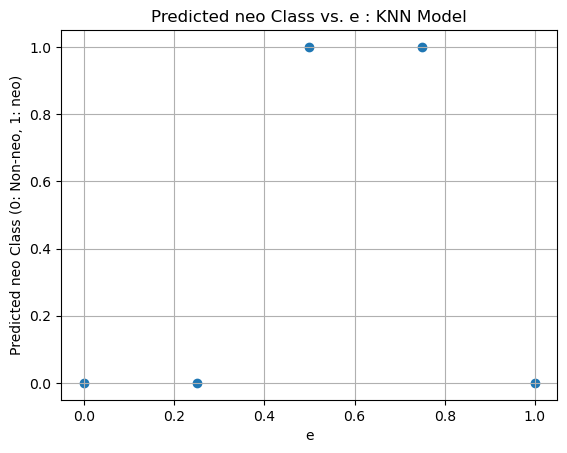


Test Pair: neo - e
- Null Hypothesis: There is no association between neo and e.
- Alternative Hypothesis: There is a significant association between NEO status and eccentricity. Near-Earth Objects (NEOs) have higher eccentricity.

- Model: XGBClassifier
  - Accuracy: 0.9854
  - Precision: 0.8030
  - Recall: 0.5259
  - F1-score: 0.6355
--------------------------------------------------------------------------------

Sample Values and Predictions:
  - Sample 1: Value = 0.0000, Predicted Class = 0 (expected low probability)
  - Sample 2: Value = 0.2500, Predicted Class = 0 (expected low probability)
  - Sample 3: Value = 0.4999, Predicted Class = 1 (expected high probability)
  - Sample 4: Value = 0.7499, Predicted Class = 1 (expected high probability)
  - Sample 5: Value = 0.9999, Predicted Class = 1 (expected high probability)


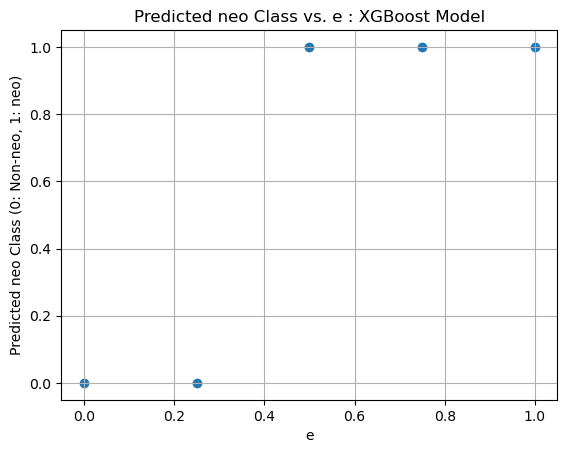


Test Pair: neo - e
- Null Hypothesis: There is no association between neo and e.
- Alternative Hypothesis: There is a significant association between NEO status and eccentricity. Near-Earth Objects (NEOs) have higher eccentricity.

- Model: RandomForestClassifier
  - Accuracy: 0.9768
  - Precision: 0.5222
  - Recall: 0.5044
  - F1-score: 0.5132
--------------------------------------------------------------------------------

Sample Values and Predictions:
  - Sample 1: Value = 0.0000, Predicted Class = 0 (expected low probability)
  - Sample 2: Value = 0.2500, Predicted Class = 0 (expected low probability)
  - Sample 3: Value = 0.4999, Predicted Class = 1 (expected high probability)
  - Sample 4: Value = 0.7499, Predicted Class = 1 (expected high probability)
  - Sample 5: Value = 0.9999, Predicted Class = 0 (expected low probability)


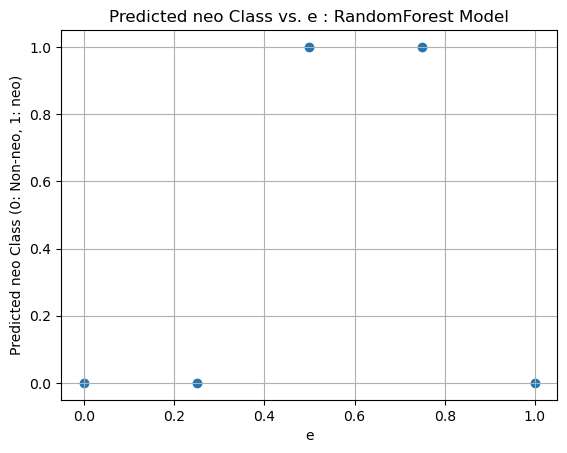


Test Pair: neo - i
- Null Hypothesis: There is no association between neo and i.
- Alternative Hypothesis: There is a significant association between NEO status and orbital inclination. Near-Earth Objects (NEOs) have lower orbital inclination (i).

- Model: KNeighborsClassifier
  - Accuracy: 0.9755
  - Precision: 0.4214
  - Recall: 0.0261
  - F1-score: 0.0492
--------------------------------------------------------------------------------

Sample Values and Predictions:
  - Sample 1: Value = 0.0077, Predicted Class = 0 (expected low probability)
  - Sample 2: Value = 43.7765, Predicted Class = 0 (expected low probability)
  - Sample 3: Value = 87.5453, Predicted Class = 0 (expected low probability)
  - Sample 4: Value = 131.3141, Predicted Class = 0 (expected low probability)
  - Sample 5: Value = 175.0829, Predicted Class = 0 (expected low probability)


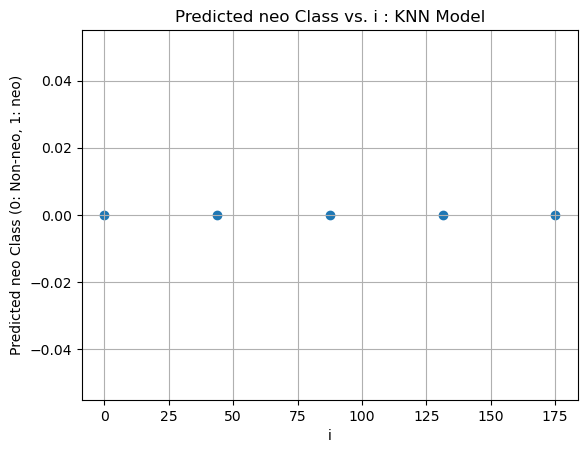


Test Pair: neo - i
- Null Hypothesis: There is no association between neo and i.
- Alternative Hypothesis: There is a significant association between NEO status and orbital inclination. Near-Earth Objects (NEOs) have lower orbital inclination (i).

- Model: XGBClassifier
  - Accuracy: 0.9758
  - Precision: 0.0000
  - Recall: 0.0000
  - F1-score: 0.0000
--------------------------------------------------------------------------------

Sample Values and Predictions:
  - Sample 1: Value = 0.0077, Predicted Class = 0 (expected low probability)
  - Sample 2: Value = 43.7765, Predicted Class = 0 (expected low probability)
  - Sample 3: Value = 87.5453, Predicted Class = 0 (expected low probability)
  - Sample 4: Value = 131.3141, Predicted Class = 0 (expected low probability)
  - Sample 5: Value = 175.0829, Predicted Class = 0 (expected low probability)


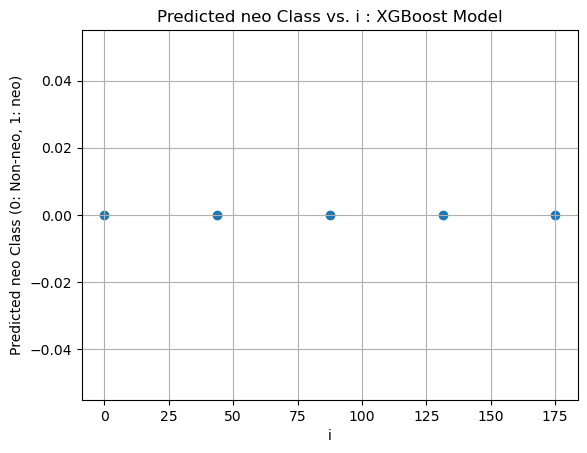


Test Pair: neo - i
- Null Hypothesis: There is no association between neo and i.
- Alternative Hypothesis: There is a significant association between NEO status and orbital inclination. Near-Earth Objects (NEOs) have lower orbital inclination (i).

- Model: RandomForestClassifier
  - Accuracy: 0.9533
  - Precision: 0.0487
  - Recall: 0.0500
  - F1-score: 0.0493
--------------------------------------------------------------------------------

Sample Values and Predictions:
  - Sample 1: Value = 0.0077, Predicted Class = 0 (expected low probability)
  - Sample 2: Value = 43.7765, Predicted Class = 0 (expected low probability)
  - Sample 3: Value = 87.5453, Predicted Class = 0 (expected low probability)
  - Sample 4: Value = 131.3141, Predicted Class = 0 (expected low probability)
  - Sample 5: Value = 175.0829, Predicted Class = 0 (expected low probability)


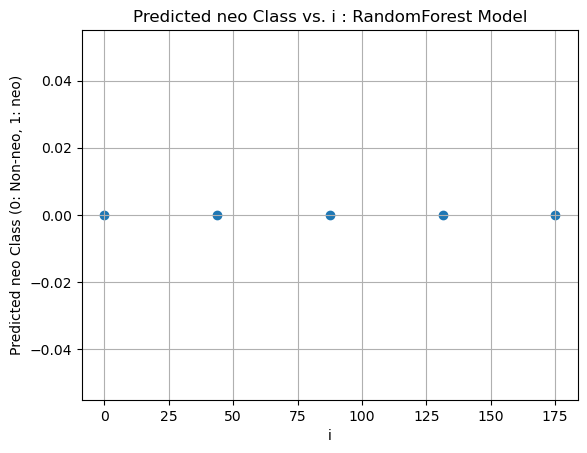

In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

import matplotlib.pyplot as plt

def test_hypothesis(df, model, model_name, feature_col, target_col, num_samples=5, test_size=0.2, random_state=42):
    """
    Tests a hypothesis using a trained model and selected feature.

    Args:
            df (pandas.DataFrame): The DataFrame containing the data.
            model (object): The machine learning model (untrained).
            feature_col (str): Name of the feature column to use for testing.
            target_col (str): Name of the target column (categorical).
            num_samples (int, optional): Number of samples to generate (default 5).
            test_size (float, optional): Proportion of data for testing (default 0.2).
            random_state (int, optional): Random seed for splitting data (default 42).

    Returns:
            None
    """

    # Separate features and target
    X = df[[feature_col]]
    y = df[target_col]

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Train the model
    model.fit(X_train, y_train)

    # Get minimum and maximum values of the feature column
    min_value = df[feature_col].min()
    max_value = df[feature_col].max()

    # Generate sample values spread across the range
    samples = np.linspace(min_value, max_value, num_samples)


    # Null Hypothesis (common for all tests)
    null_hypothesis = f"There is no association between {target_col} and {feature_col}."
    # Define alternative hypothesis dictionary
    alternative_hypothesis = {
        "neo_q": "There is a significant association between NEO status and perihelion distance. Asteroids with smaller perihelion distances are more likely to be classified as NEOs.",
        "pha_moid_ld": "There is a significant association between PHA status and minimum orbit intersection distance. Asteroids with smaller minimum orbit intersection distance (moid_ld) are more likely to be classified as PHAs.",
        "pha_H": "There is a significant association between PHA status and absolute magnitude. Asteroids marked as Potentially Hazardous Asteroids (PHAs) have lower absolute magnitude (H) values.",
        "neo_e": "There is a significant association between NEO status and eccentricity. Near-Earth Objects (NEOs) have higher eccentricity.",
        "neo_i": "There is a significant association between NEO status and orbital inclination. Near-Earth Objects (NEOs) have lower orbital inclination (i).",
        }

    

    # Calculate model scores
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Print Results with Alternate Hypothesis
    print(f"\nTest Pair: {target_col} - {feature_col}")
    print(f"- Null Hypothesis: {null_hypothesis}")
    print(f"- Alternative Hypothesis: {alternative_hypothesis[f'{target_col}_{feature_col}']}")  # Access by formatted string
    print(f"\n- Model: {model.__class__.__name__}")
    print(f"  - Accuracy: {accuracy:.4f}")
    print(f"  - Precision: {precision:.4f}")
    print(f"  - Recall: {recall:.4f}")
    print(f"  - F1-score: {f1:.4f}")
    print("-"*80)

    # Make predictions and interpretations for all samples
    predictions, interpretations = [], []
    for sample in samples:
            sample_df = pd.DataFrame([[sample]], columns=[feature_col])
            predicted_class = model.predict(sample_df)[0]
            interpretation = " (expected high probability)" if predicted_class == 1 else " (expected low probability)"
            predictions.append(predicted_class)
            interpretations.append(interpretation)

    print("\nSample Values and Predictions:")
    for i, sample in enumerate(samples):
            print(f"  - Sample {i+1}: Value = {sample:.4f}, Predicted Class = {predictions[i]}{interpretations[i]}")

    # Create a scatter plot
    plt.scatter(samples, predictions)
    plt.xlabel(feature_col)
    plt.ylabel(f"Predicted {target_col} Class (0: Non-{target_col}, 1: {target_col})")
    plt.title(f"Predicted {target_col} Class vs. {feature_col} : {model_name} Model")
    plt.grid(True)
    plt.show()

# Define your test pairs (hypothesis pairs)
test_pairs = [
    ("neo", "q"),
    ("pha", "moid_ld"),
    ("pha", "H"),
    ("neo", "e"),
    ("neo", "i"),
]

# Assuming you have a dictionary of untrained models (replace with your actual models)
models = {
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "RandomForest": RandomForestClassifier(random_state=100)
}

# Loop through test pairs and call the function for each hypothesis
for target_col, feature_col in test_pairs:
  for model_name, model in models.items():
    # Train the model using the current target and feature
    test_hypothesis(df.copy(), model, model_name, feature_col, target_col)  # Use copies to avoid modifying originals 
 